In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score
from sklearn.preprocessing import LabelEncoder

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('./Dataset/xbox_search.csv')

In [5]:
df.head()

,user,sku,category,query,click_time,query_time
0,0001cd0d10bbc585c9ba287c963e00873d4c0bfd,2032076,abcat0701002,gears of war,2011-10-09 17:22:56.101,2011-10-09 17:21:42.917
1,00033dbced6acd3626c4b56ff5c55b8d69911681,9854804,abcat0701002,Gears of war,2011-09-25 13:35:42.198,2011-09-25 13:35:33.234
2,00033dbced6acd3626c4b56ff5c55b8d69911681,2670133,abcat0701002,Gears of war,2011-09-25 13:36:08.668,2011-09-25 13:35:33.234
3,00033dbced6acd3626c4b56ff5c55b8d69911681,9984142,abcat0701002,Assassin creed,2011-09-25 13:37:23.709,2011-09-25 13:37:00.049
4,0007756f015345450f7be1df33695421466b7ce4,2541184,abcat0701002,dead island,2011-09-11 15:15:34.336,2011-09-11 15:15:26.206


In [6]:
df.describe()

,sku
count,4.236500e+04
mean,2.360281e+11
std,4.858031e+13
min,1.004622e+06
25%,2.173065e+06
50%,2.670133e+06
75%,3.046603e+06
max,9.999169e+15


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42365 entries, 0 to 42364
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user        42365 non-null  object
 1   sku         42365 non-null  int64 
 2   category    42365 non-null  object
 3   query       42365 non-null  object
 4   click_time  42365 non-null  object
 5   query_time  42365 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.9+ MB


In [8]:
df.dtypes

user          object
sku            int64
category      object
query         object
click_time    object
query_time    object
dtype: object

# Exploratory Data Analysis

In [9]:
df['query'].value_counts()

query
Gears of war 3                             1471
Dead island                                1350
Battlefield 3                              1012
dead island                                 911
gears of war 3                              877
                                           ... 
ccall of duty modern warfare 3 hardened       1
Batman the brave and the bold                 1
dc xbox                                       1
chuck dvd                                     1
Limited edition forza 4                       1
Name: count, Length: 5960, dtype: int64

In [10]:
df['query'].unique()

array(['gears of war', 'Gears of war', 'Assassin creed', ...,
       'Xbox fable ii', 'legend of troy', 'Limited edition forza 4'],
      dtype=object)

In [11]:
df['query'].nunique()

5960

In [12]:
df.isna().sum()

user          0
sku           0
category      0
query         0
click_time    0
query_time    0
dtype: int64

In [13]:
df['sku'].value_counts()[0:10]

sku
9854804    2966
2107458    2607
2541184    2557
2670133    2321
2173065    2075
2945052    1832
2078113    1343
2953607    1129
2467129    1039
2977637    1019
Name: count, dtype: int64

In [14]:
newdf = df[(df['sku']==9854804) | (df['sku']==2107458)]
newdf

,user,sku,category,query,click_time,query_time
1,00033dbced6acd3626c4b56ff5c55b8d69911681,9854804,abcat0701002,Gears of war,2011-09-25 13:35:42.198,2011-09-25 13:35:33.234
12,0010a136a422578130886603598d52f326a8927b,9854804,abcat0701002,Gears of war 3,2011-10-08 15:54:06.4,2011-10-08 15:53:31.486
23,001d856329a212eb052e1597663150a2421a3c02,9854804,abcat0701002,Gears of war 3,2011-09-07 17:48:58.823,2011-09-07 17:48:52.138
31,0030b51e85341499f00456e0706f9a5fec8d1d1e,9854804,abcat0701002,Gears of war 3,2011-09-05 20:25:51.207,2011-09-05 20:25:04.134
39,004070311172f0fa3974a88133b5769135ac2938,9854804,abcat0701002,Gears of war,2011-09-20 02:25:50.707,2011-09-20 02:25:34.905
...,...,...,...,...,...,...
42318,ffad00eed46cb26a07f8bff3d486517ae954a156,9854804,abcat0701002,Gears of war,2011-09-18 13:38:26.501,2011-09-18 13:35:23.344
42336,ffc71fdb3a23e44c42d5b0f6a3000900a84627c8,2107458,abcat0701002,battefield 3,2011-10-20 22:25:26.742,2011-10-20 22:24:26.833
42340,ffd516c399d0e348b5d4d707a29ccbe9defe384b,2107458,abcat0701002,battefield,2011-10-29 12:14:37.458,2011-10-29 12:14:28.764
42343,ffdd8017f1216292021162aa4513d476500c09ce,9854804,abcat0701002,Gears of war 3,2011-09-23 05:44:36.313,2011-09-23 05:44:20.78


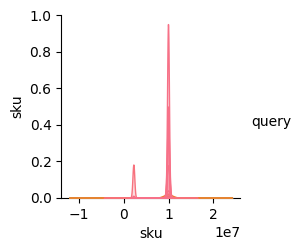

In [15]:
sns.pairplot(newdf, hue='query')

<Axes: >

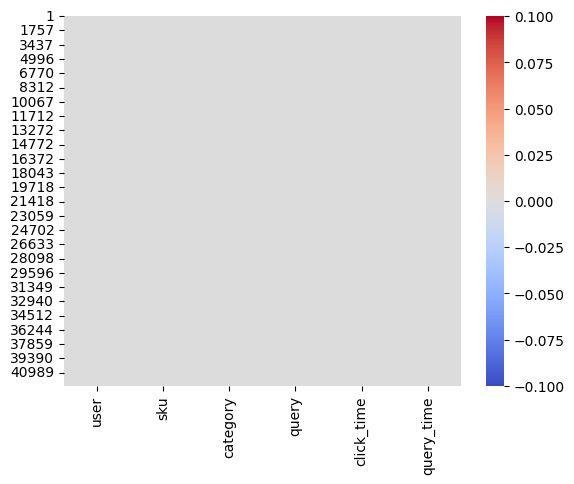

In [16]:
sns.heatmap(newdf.isnull(),cmap='coolwarm')

# Data Preprocessing

In [17]:
newdf['query_length'] = newdf['query'].apply(len)
newdf

,user,sku,category,query,click_time,query_time,query_length
1,00033dbced6acd3626c4b56ff5c55b8d69911681,9854804,abcat0701002,Gears of war,2011-09-25 13:35:42.198,2011-09-25 13:35:33.234,12
12,0010a136a422578130886603598d52f326a8927b,9854804,abcat0701002,Gears of war 3,2011-10-08 15:54:06.4,2011-10-08 15:53:31.486,14
23,001d856329a212eb052e1597663150a2421a3c02,9854804,abcat0701002,Gears of war 3,2011-09-07 17:48:58.823,2011-09-07 17:48:52.138,14
31,0030b51e85341499f00456e0706f9a5fec8d1d1e,9854804,abcat0701002,Gears of war 3,2011-09-05 20:25:51.207,2011-09-05 20:25:04.134,14
39,004070311172f0fa3974a88133b5769135ac2938,9854804,abcat0701002,Gears of war,2011-09-20 02:25:50.707,2011-09-20 02:25:34.905,12
...,...,...,...,...,...,...,...
42318,ffad00eed46cb26a07f8bff3d486517ae954a156,9854804,abcat0701002,Gears of war,2011-09-18 13:38:26.501,2011-09-18 13:35:23.344,12
42336,ffc71fdb3a23e44c42d5b0f6a3000900a84627c8,2107458,abcat0701002,battefield 3,2011-10-20 22:25:26.742,2011-10-20 22:24:26.833,12
42340,ffd516c399d0e348b5d4d707a29ccbe9defe384b,2107458,abcat0701002,battefield,2011-10-29 12:14:37.458,2011-10-29 12:14:28.764,10
42343,ffdd8017f1216292021162aa4513d476500c09ce,9854804,abcat0701002,Gears of war 3,2011-09-23 05:44:36.313,2011-09-23 05:44:20.78,14


<Axes: xlabel='query_length', ylabel='Count'>

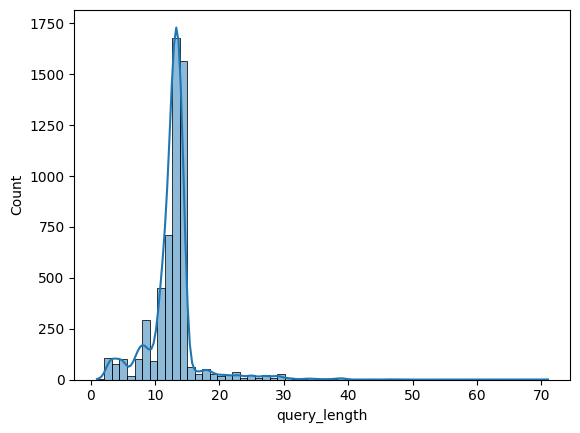

In [18]:
sns.histplot(newdf['query_length'],bins=60,kde=True)

In [19]:
newdf['click_time'] = pd.to_datetime(newdf['click_time'], errors='coerce')

In [20]:
newdf['click_time'] = pd.to_datetime(newdf['click_time'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
newdf['click_time'] = newdf['click_time'].fillna(pd.to_datetime(newdf['click_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce'))

In [21]:
newdf['click_time'] = pd.to_datetime(newdf['click_time'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
newdf['click_time'] = newdf['click_time'].fillna(pd.to_datetime(newdf['click_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce'))

In [22]:
newdf['click_time'] = pd.to_datetime(newdf['click_time'], format='mixed', errors='coerce')

In [23]:
newdf = newdf.dropna(subset=['click_time'])

In [24]:
newdf

,user,sku,category,query,click_time,query_time,query_length
1,00033dbced6acd3626c4b56ff5c55b8d69911681,9854804,abcat0701002,Gears of war,2011-09-25 13:35:42.198,2011-09-25 13:35:33.234,12
12,0010a136a422578130886603598d52f326a8927b,9854804,abcat0701002,Gears of war 3,2011-10-08 15:54:06.400,2011-10-08 15:53:31.486,14
23,001d856329a212eb052e1597663150a2421a3c02,9854804,abcat0701002,Gears of war 3,2011-09-07 17:48:58.823,2011-09-07 17:48:52.138,14
31,0030b51e85341499f00456e0706f9a5fec8d1d1e,9854804,abcat0701002,Gears of war 3,2011-09-05 20:25:51.207,2011-09-05 20:25:04.134,14
39,004070311172f0fa3974a88133b5769135ac2938,9854804,abcat0701002,Gears of war,2011-09-20 02:25:50.707,2011-09-20 02:25:34.905,12
...,...,...,...,...,...,...,...
42318,ffad00eed46cb26a07f8bff3d486517ae954a156,9854804,abcat0701002,Gears of war,2011-09-18 13:38:26.501,2011-09-18 13:35:23.344,12
42336,ffc71fdb3a23e44c42d5b0f6a3000900a84627c8,2107458,abcat0701002,battefield 3,2011-10-20 22:25:26.742,2011-10-20 22:24:26.833,12
42340,ffd516c399d0e348b5d4d707a29ccbe9defe384b,2107458,abcat0701002,battefield,2011-10-29 12:14:37.458,2011-10-29 12:14:28.764,10
42343,ffdd8017f1216292021162aa4513d476500c09ce,9854804,abcat0701002,Gears of war 3,2011-09-23 05:44:36.313,2011-09-23 05:44:20.78,14


In [25]:
newdf['query_time'] = pd.to_datetime(newdf['query_time'], errors='coerce')
print(newdf['query_time'].isna().sum())

6


In [26]:
newdf = newdf.dropna(subset=['query_time'])

In [27]:
newdf.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 5558 entries, 1 to 42351
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user          5558 non-null   object        
 1   sku           5558 non-null   int64         
 2   category      5558 non-null   object        
 3   query         5558 non-null   object        
 4   click_time    5558 non-null   datetime64[ns]
 5   query_time    5558 non-null   datetime64[ns]
 6   query_length  5558 non-null   int64         
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 347.4+ KB


In [28]:
newdf['click_time_numeric'] = (newdf['click_time'] - newdf['click_time'].min()).dt.total_seconds()
newdf['query_time_numeric'] = (newdf['query_time'] - newdf['query_time'].min()).dt.total_seconds()

In [29]:
newdf = newdf.drop(['click_time', 'query_time'], axis=1)
newdf

,user,sku,category,query,query_length,click_time_numeric,query_time_numeric
1,00033dbced6acd3626c4b56ff5c55b8d69911681,9854804,abcat0701002,Gears of war,12,3893495.423,3893765.508
12,0010a136a422578130886603598d52f326a8927b,9854804,abcat0701002,Gears of war 3,14,5024999.625,5025243.760
23,001d856329a212eb052e1597663150a2421a3c02,9854804,abcat0701002,Gears of war 3,14,2353492.048,2353764.412
31,0030b51e85341499f00456e0706f9a5fec8d1d1e,9854804,abcat0701002,Gears of war 3,14,2190104.432,2190336.408
39,004070311172f0fa3974a88133b5769135ac2938,9854804,abcat0701002,Gears of war,12,3421303.932,3421567.179
...,...,...,...,...,...,...,...
42318,ffad00eed46cb26a07f8bff3d486517ae954a156,9854804,abcat0701002,Gears of war,12,3288859.726,3288955.618
42336,ffc71fdb3a23e44c42d5b0f6a3000900a84627c8,2107458,abcat0701002,battefield 3,12,6085279.967,6085499.107
42340,ffd516c399d0e348b5d4d707a29ccbe9defe384b,2107458,abcat0701002,battefield,10,6826230.683,6826501.038
42343,ffdd8017f1216292021162aa4513d476500c09ce,9854804,abcat0701002,Gears of war 3,14,3692429.538,3692693.054


In [30]:
le = LabelEncoder()
newdf['query'] = le.fit_transform(newdf['query'])

In [31]:
newdf

,user,sku,category,query,query_length,click_time_numeric,query_time_numeric
1,00033dbced6acd3626c4b56ff5c55b8d69911681,9854804,abcat0701002,169,12,3893495.423,3893765.508
12,0010a136a422578130886603598d52f326a8927b,9854804,abcat0701002,171,14,5024999.625,5025243.760
23,001d856329a212eb052e1597663150a2421a3c02,9854804,abcat0701002,171,14,2353492.048,2353764.412
31,0030b51e85341499f00456e0706f9a5fec8d1d1e,9854804,abcat0701002,171,14,2190104.432,2190336.408
39,004070311172f0fa3974a88133b5769135ac2938,9854804,abcat0701002,169,12,3421303.932,3421567.179
...,...,...,...,...,...,...,...
42318,ffad00eed46cb26a07f8bff3d486517ae954a156,9854804,abcat0701002,169,12,3288859.726,3288955.618
42336,ffc71fdb3a23e44c42d5b0f6a3000900a84627c8,2107458,abcat0701002,374,12,6085279.967,6085499.107
42340,ffd516c399d0e348b5d4d707a29ccbe9defe384b,2107458,abcat0701002,373,10,6826230.683,6826501.038
42343,ffdd8017f1216292021162aa4513d476500c09ce,9854804,abcat0701002,171,14,3692429.538,3692693.054


In [32]:
X = newdf.drop(['user','sku','category'],axis=1)
y = newdf['sku']

In [33]:
X

,query,query_length,click_time_numeric,query_time_numeric
1,169,12,3893495.423,3893765.508
12,171,14,5024999.625,5025243.760
23,171,14,2353492.048,2353764.412
31,171,14,2190104.432,2190336.408
39,169,12,3421303.932,3421567.179
...,...,...,...,...
42318,169,12,3288859.726,3288955.618
42336,374,12,6085279.967,6085499.107
42340,373,10,6826230.683,6826501.038
42343,171,14,3692429.538,3692693.054


In [34]:
y

1        9854804
12       9854804
23       9854804
31       9854804
39       9854804
          ...   
42318    9854804
42336    2107458
42340    2107458
42343    9854804
42351    2107458
Name: sku, Length: 5558, dtype: int64

# Applying algorithms

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)
accuracies = dict()

In [36]:
X_test

,query,query_length,click_time_numeric,query_time_numeric
972,64,13,6817200.454,6817463.220
35043,64,13,6571111.723,6571380.948
28947,468,12,6519288.871,6519549.503
41906,64,13,6397094.436,6397348.857
20029,470,14,3782174.272,3782439.199
...,...,...,...,...
1382,64,13,6404471.717,6404745.309
28211,64,13,4963510.979,4963764.739
7633,470,14,3024071.686,3024316.807
5997,470,14,4486206.998,4486416.819


In [37]:
X_train

,query,query_length,click_time_numeric,query_time_numeric
26665,610,7,5442651.354,5442921.211
26196,64,13,2013787.243,2014054.480
30946,470,14,3196604.217,3196867.441
882,470,14,3041262.756,3041518.301
11264,171,14,3541471.051,3541737.561
...,...,...,...,...
3918,399,13,6428359.809,6428615.033
7254,580,9,3581248.927,3581515.543
32631,1,13,3459557.448,3459830.828
21841,64,13,6531840.581,6532054.100


## Logistic Regression

In [38]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [39]:
predictions = lr.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
accuracies['Logistic Regression']=accuracy*100
print('Logistic Regression  :',accuracy*100)

Logistic Regression  : 79.25659472422062


## Random Forest

In [40]:
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [41]:
predictions = rfc.predict(X_test)
accuracy=accuracy_score(y_test,predictions)
accuracies['Random Forest']=accuracy*100
print('Random Forest :',accuracy*100)

Random Forest : 95.80335731414868


In [42]:
accuracies

{'Logistic Regression': 79.25659472422062, 'Random Forest': 95.80335731414868}

In [43]:
acc = pd.DataFrame.from_dict(accuracies,orient='index',columns = ['Accuracy'])

NameError: name 'accu' is not defined

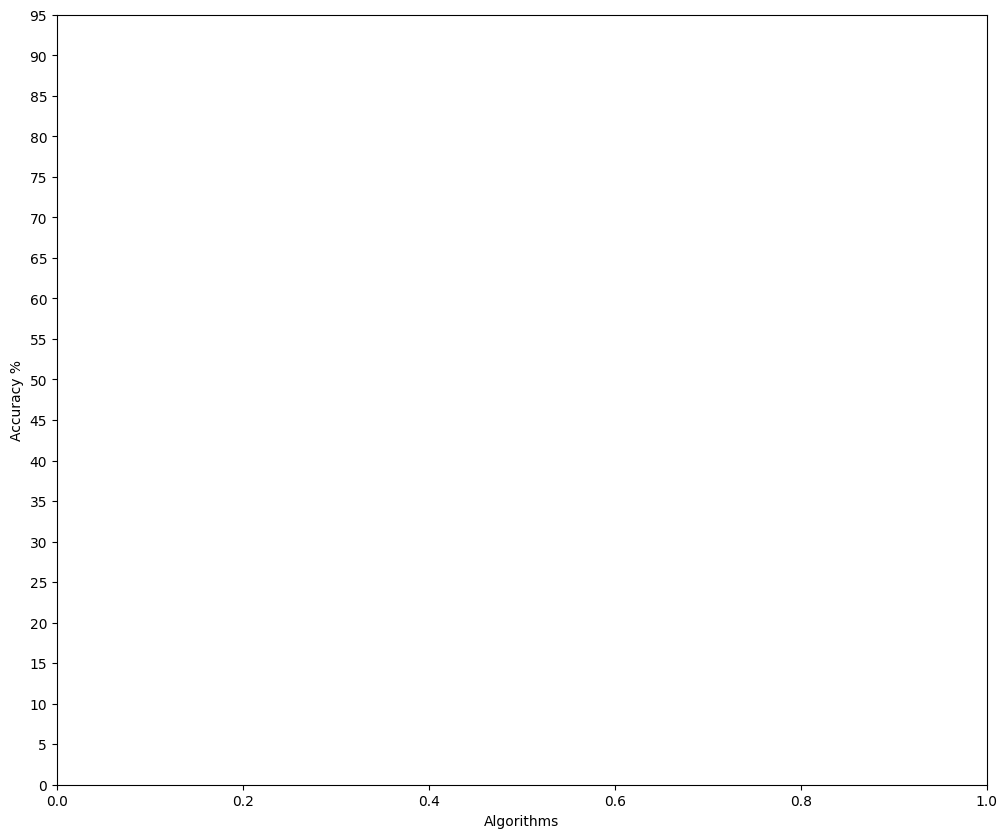

In [44]:
plt.figure(figsize=(12,10))
plt.yticks(np.arange(0,100,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=acc.index,y=accu['Accuracy'])